In [2]:
import numpy as np
import pandas as pd
import gzip
from rdkit import DataStructs
from rdkit import RDLogger
from rdkit import Chem
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem.inchi import MolToInchiKey

RDLogger.DisableLog('rdApp.error')

In [5]:
df = np.load('df.npy', allow_pickle=True)
df = pd.DataFrame(df)
df.columns = ['Mol', 'Source', 'FP']
df

,Mol,Source,FP
0,<rdkit.Chem.rdchem.Mol object at 0x7fba07508d30>,DrugBank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8a0feb0>,DrugBank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8a0ffb0>,DrugBank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8a0fcb0>,DrugBank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8a0fab0>,DrugBank,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
...,...,...,...
7908,<rdkit.Chem.rdchem.Mol object at 0x7fb9e84999b0>,actives,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7909,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8499ab0>,actives,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7910,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8499bb0>,actives,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7911,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8499cb0>,actives,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
from rdkit import DataStructs

def distance_function(i1, i2):
    return 1 - DataStructs.TanimotoSimilarity(df.FP[i1], df.FP[i2])

In [12]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(df.FP), 100))
picked

[6082,
 400,
 645,
 850,
 1188,
 1198,
 1199,
 1202,
 1378,
 1379,
 2610,
 2695,
 2771,
 2784,
 3949,
 4637,
 4663,
 4677,
 6852,
 6876,
 6982,
 6996,
 7010,
 7017,
 7018,
 7042,
 2019,
 1045,
 441,
 3881,
 2152,
 3796,
 2366,
 3663,
 80,
 5921,
 6652,
 2357,
 1153,
 3153,
 1568,
 1757,
 4003,
 2121,
 3899,
 351,
 7558,
 451,
 2819,
 6869,
 1715,
 1881,
 4064,
 524,
 759,
 951,
 967,
 2433,
 6954,
 152,
 872,
 1791,
 3862,
 6878,
 1482,
 1487,
 2498,
 401,
 3628,
 4166,
 899,
 1488,
 676,
 318,
 2796,
 4282,
 6873,
 7063,
 7107,
 4579,
 6877,
 1480,
 4949,
 6868,
 7241,
 8,
 5578,
 220,
 4430,
 303,
 2637,
 3752,
 4497,
 116,
 7857,
 7193,
 253,
 477,
 1514,
 2966]

In [14]:
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski

df['MW'] = df['Mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['rings'] = df['Mol'].apply(lambda x: Chem.GetSSSR(x))
df['HBA'] = df['Mol'].apply(lambda x: Lipinski.NumHAcceptors(x))
df['HBD'] = df['Mol'].apply(lambda x: Lipinski.NumHDonors(x))
df['logP'] = df['Mol'].apply(lambda x: Descriptors.MolLogP(x))
df['TPSA'] = df['Mol'].apply(lambda x: Descriptors.TPSA(x))
df['RB'] = df['Mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))
df

,Mol,Source,FP,MW,rings,HBA,HBD,logP,TPSA,RB
0,<rdkit.Chem.rdchem.Mol object at 0x7fba07508d30>,DrugBank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2178.985813,6,29,28,-8.11643,901.57,66
1,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8a0feb0>,DrugBank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1268.641439,6,16,17,-3.10570,495.89,31
2,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8a0ffb0>,DrugBank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1068.426955,4,15,14,-4.13203,435.41,19
3,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8a0fcb0>,DrugBank,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1429.669818,6,16,17,-0.50613,495.67,38
4,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8a0fab0>,DrugBank,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1201.841368,1,12,5,3.26900,278.80,15
...,...,...,...,...,...,...,...,...,...,...
7908,<rdkit.Chem.rdchem.Mol object at 0x7fb9e84999b0>,actives,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",357.089560,4,6,2,0.86340,123.73,3
7909,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8499ab0>,actives,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",288.060234,1,6,1,2.53530,68.29,4
7910,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8499bb0>,actives,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",405.216475,4,3,3,4.13040,90.12,6
7911,<rdkit.Chem.rdchem.Mol object at 0x7fb9e8499cb0>,actives,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",405.216475,4,3,3,4.13040,90.12,6


In [19]:
def picked_flag(x):
    if x in picked:
        return 'picked'
    else:
        return 'not-picked'
    
df['in'] = df.index
df['picked'] = df['in'].apply(lambda x: picked_flag(x))

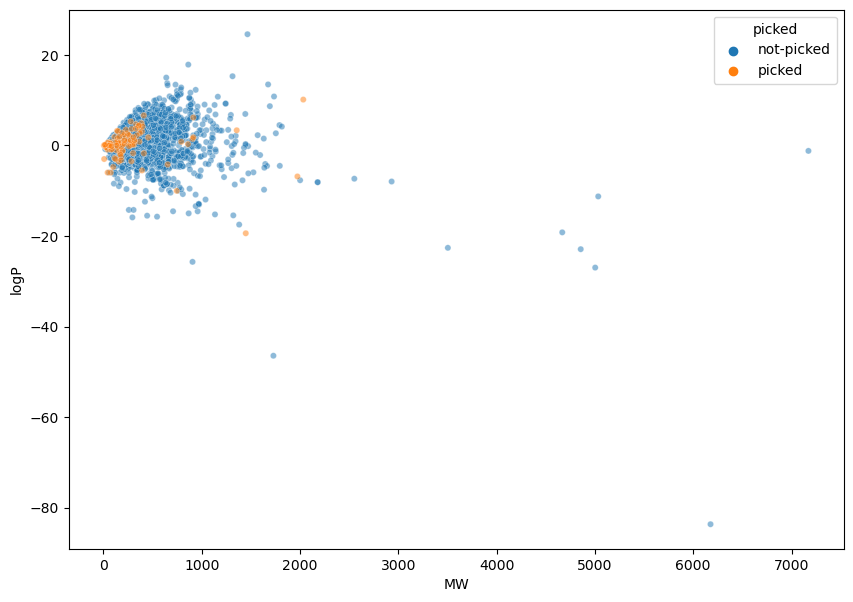

In [34]:
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='MW',
    y='logP',
    data=df.sort_values('picked'),
    hue='picked',
    legend='brief',
    ax=ax,
    alpha=0.5,
    s=20
)

In [40]:
from sklearn.manifold import TSNE

D = pd.DataFrame(np.load('dist_matrix.npy'))
ts = TSNE(metric='precomputed', init='random').fit_transform(D)
ts



/home/vmelichar/anaconda3/envs/PNL/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/vmelichar/anaconda3/envs/PNL/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


array([[-0.773466  , -2.276763  ],
       [-0.75049925, -2.2641633 ],
       [-0.57184494, -1.7122556 ],
       ...,
       [-1.5251361 , -2.88115   ],
       [-1.5298243 , -2.8653    ],
       [ 2.6359994 ,  3.2793078 ]], dtype=float32)

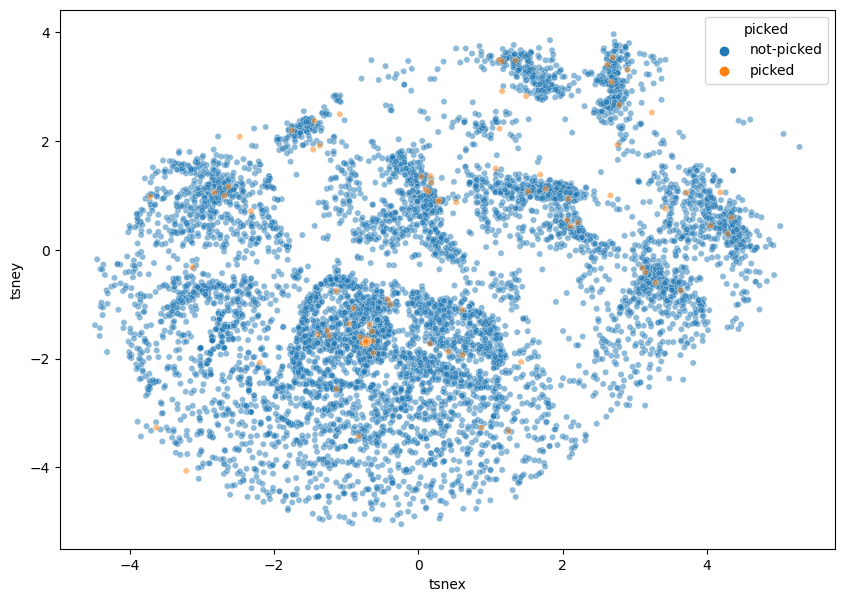

In [41]:
df2 = df.join(pd.DataFrame(ts, columns=('tsnex', 'tsney')))

fig, ax = plt.subplots(figsize=(10,7))
p = seaborn.scatterplot(
    x='tsnex',
    y='tsney',
    data=df2.sort_values('picked'),
    hue='picked',
    legend='brief',
    ax=ax,
    alpha=0.5,
    s=20
)